<a href="https://colab.research.google.com/github/Jeff980720/Modulo-5/blob/main/RepasoPractico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url="https://raw.githubusercontent.com/kevin19925/modulo5/31d3a23df48b1679c899d38ac212ee490d0bcaef/ventas_tienda.csv"
df=pd.read_csv(url)
# df.head()
# print(df.dtypes)
#Limpieza de datos:
df['Fecha']=pd.to_datetime(df['Fecha'])
df['Hora']=pd.to_datetime(df['Hora'], format='%H:%M:%S').dt.time
df['Categoría']=df['Categoría'].astype('category')
df['Método_Pago']=df['Método_Pago'].astype('category')
df['Tipo_Cliente']=df['Tipo_Cliente'].astype('category')
df['Fecha_Entrega']=pd.to_datetime(df['Fecha_Entrega'])
df['Hora_Entrega']=pd.to_datetime(df['Hora_Entrega'], format='%H:%M:%S').dt.time
df['Fecha_Registro_Cliente']=pd.to_datetime(df['Fecha_Registro_Cliente'])
df['Genero_Cliente']=df['Genero_Cliente'].astype('category')

df.drop_duplicates(inplace=True) ##Borra filas duplicada.
df['Ciudad'].fillna('Desconocida',inplace=True) #Reemplaza valores nulos por los especificados
df.isnull().sum()
df.info()
# print(df.dtypes)

<ipython-input-18-e21bff386e46>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_categoria=df.groupby('Categoría')['Total_Venta'].sum().reset_index()
<ipython-input-18-e21bff386e46>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


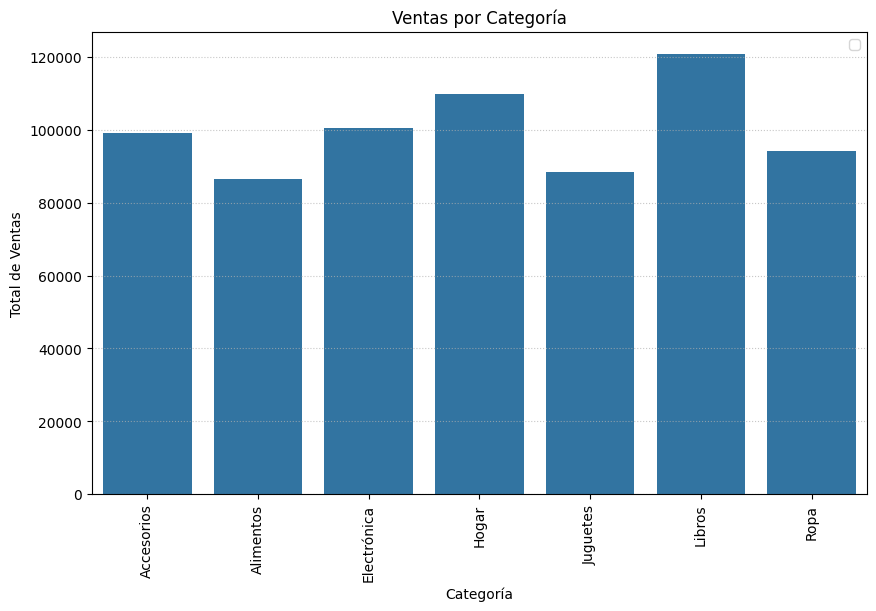

In [18]:
#1. Ventas por categoria
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ventas_categoria=df.groupby('Categoría')['Total_Venta'].sum().reset_index()
# print(ventas_categoria)

##Crear la grafica
fig, ax=plt.subplots(figsize=(10,6))
sns.barplot(x='Categoría',y='Total_Venta',data=ventas_categoria,ax=ax)
ax.ticklabel_format(style='plain', axis='y')

plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Mostrar el gráfico
plt.show()



**Que categorias de productos genera mas ingresos?**

De acuerdo a las grafica las categorias son: Libros, Hogar, Electronica


       Método_Pago  Frecuencia
0         Efectivo         121
1   Tarjeta Débito         105
2           PayPal          97
3  Tarjeta Crédito          96
4    Transferencia          81


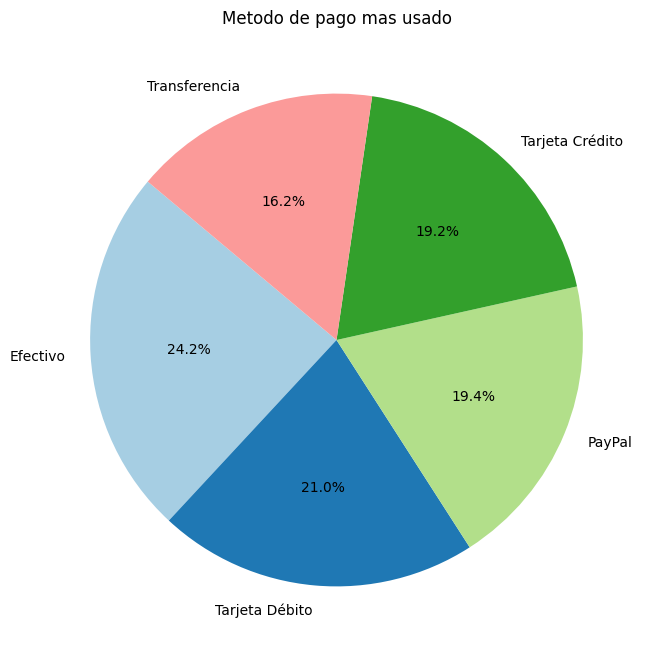

In [21]:
#2. Metodo de pago mas usado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
metodo_pago_mas_usado=df['Método_Pago'].value_counts().reset_index()
metodo_pago_mas_usado.columns=['Método_Pago','Frecuencia']
print(metodo_pago_mas_usado)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(metodo_pago_mas_usado["Frecuencia"], labels=metodo_pago_mas_usado["Método_Pago"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Metodo de pago mas usado")
plt.show()

**Cual es el metodo de pago mas utilizado?**

De acuerdo al grafico el mas utilizado es el efectivo.

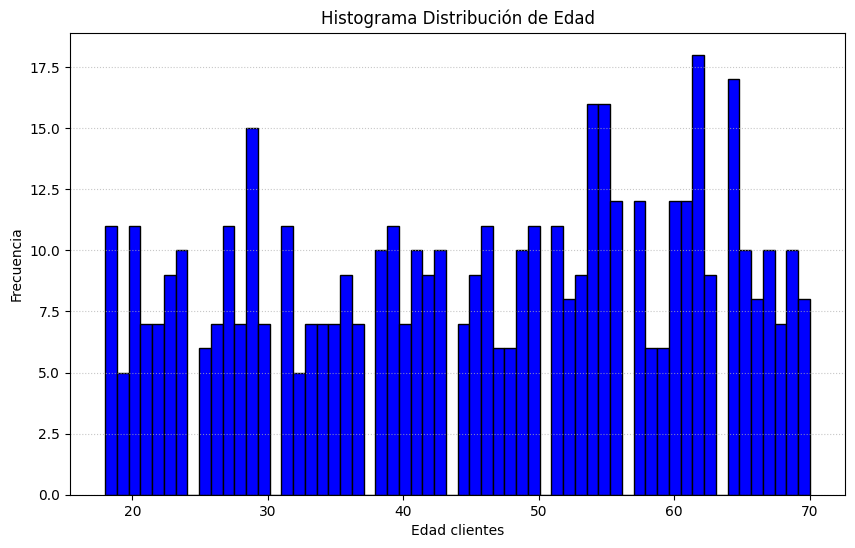

In [30]:
#3. Distribucion de edad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(df["Edad_Cliente"], bins=60, color="blue",edgecolor='black')
plt.grid(axis="y", linestyle="dotted", alpha=0.7)

plt.xlabel("Edad clientes")
plt.ylabel("Frecuencia")
plt.title("Histograma Distribución de Edad")

plt.show()

**Como de distribuye la edad de los clientes?**

La edad de los clientes abarca desde los 20 hasta los 70 años, con diferentes concentraciones en ciertos rangos.

Picos de frecuencia: Se observa un pico significativo alrededor de los 30 años y otro cerca de los 60 años, lo que sugiere que estos grupos de edad representan una mayor proporción de los clientes.


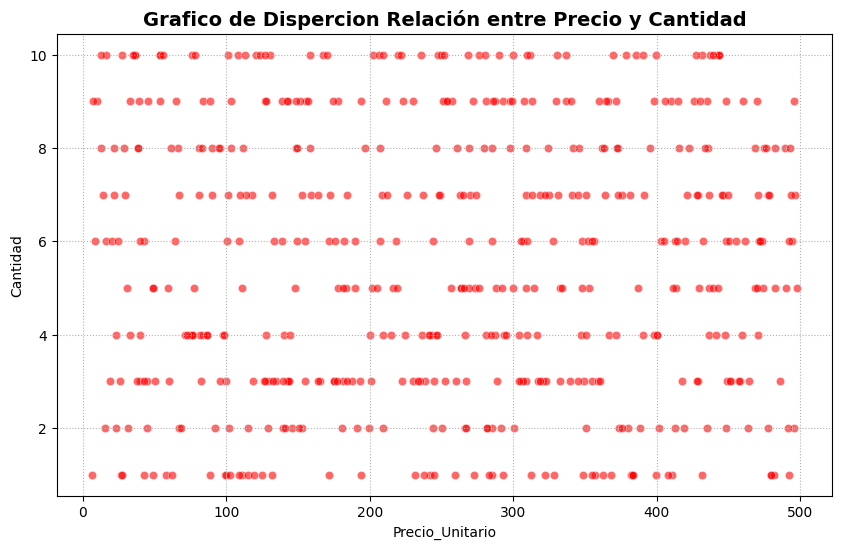

In [32]:
#4. Precio vs Cantidad vendida
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Precio_Unitario', y='Cantidad', alpha=0.6, color='red')

plt.title("Grafico de Dispercion Relación entre Precio y Cantidad", fontsize=14, fontweight='bold')
plt.xlabel("Precio_Unitario")
plt.ylabel("Cantidad")
plt.grid(True, linestyle='dotted')

plt.show()

**Existe relacion entre el precio del producto y la cantidad vendida?**

Si los puntos forman una tendencia clara (ascendente o descendente), esto indicaría una correlación entre precio y cantidad.

En este caso, los puntos parecen estar distribuidos sin una tendencia obvia, lo que sugiere que el precio unitario no influye directamente en la cantidad

   Tipo_Cliente    Categoría  Total_Venta
0     Frecuente   Accesorios     39469.61
1     Frecuente    Alimentos     59052.91
2     Frecuente  Electrónica     59516.63
3     Frecuente        Hogar     53069.79
4     Frecuente     Juguetes     48295.48
5     Frecuente       Libros     65624.82
6     Frecuente         Ropa     47552.23
7         Nuevo   Accesorios     59605.17
8         Nuevo    Alimentos     27445.33
9         Nuevo  Electrónica     40927.49
10        Nuevo        Hogar     56779.47
11        Nuevo     Juguetes     40086.00
12        Nuevo       Libros     55207.43
13        Nuevo         Ropa     46743.69


<ipython-input-46-014136cf549a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clientes=df.groupby('Tipo_Cliente')['Total_Venta'].count().reset_index()
<ipython-input-46-014136cf549a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_clientes=df.groupby(['Tipo_Cliente'])['Total_Venta'].sum().reset_index()
<ipython-input-46-014136cf549a>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_clientes_categorias=

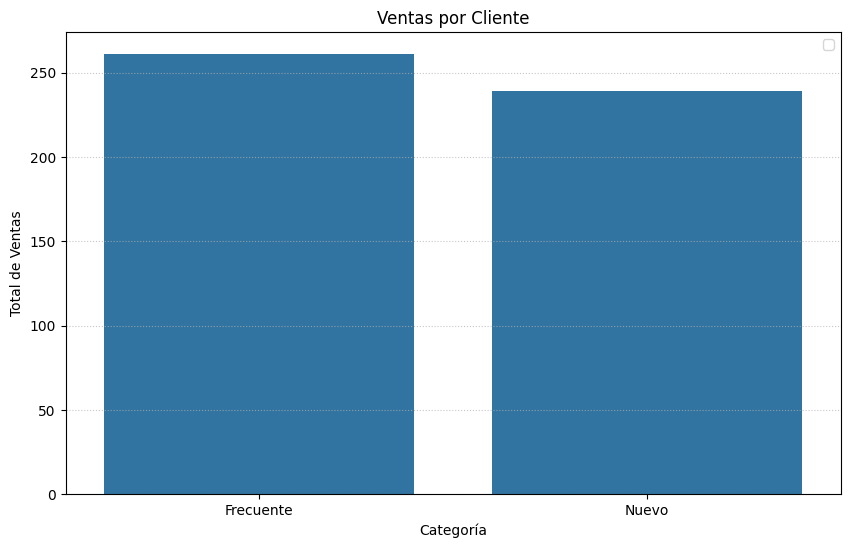

In [46]:
#5. Clientes nuevos vs frecuentes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clientes=df.groupby('Tipo_Cliente')['Total_Venta'].count().reset_index()
clientes.columns=['Tipo_Cliente','Frecuencia']

ventas_clientes=df.groupby(['Tipo_Cliente'])['Total_Venta'].sum().reset_index()

ventas_clientes_categorias=df.groupby(['Tipo_Cliente','Categoría'])['Total_Venta'].sum().reset_index()
# print(clientes)
# print(ventas_clientes)
print(ventas_clientes_categorias)

##Crear la grafica
fig, ax=plt.subplots(figsize=(10,6))
sns.barplot(x='Tipo_Cliente',y='Frecuencia',data=clientes,ax=ax)
ax.ticklabel_format(style='plain', axis='y')

plt.title('Ventas por Cliente')
plt.xlabel('Categoría')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Mostrar el gráfico
plt.show()

**Los clientes nuevos compran mas que los frecuentes?**

El grafico nos indica que si los nuevos compran mas que los frecuentes.

<ipython-input-51-453c0acd617f>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


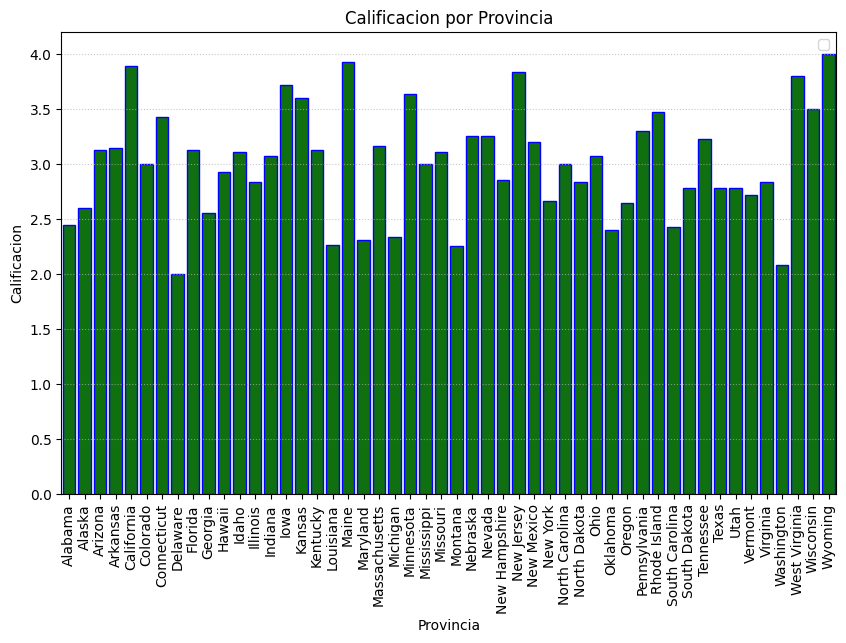

In [51]:
#6. Calificacion por provincia
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

califivacion_provincia=df.groupby(['Provincia'])['Calificación_Cliente'].mean().reset_index()
# print(califivacion_provincia)

##Crear la grafica
fig, ax=plt.subplots(figsize=(10,6))
sns.barplot(x='Provincia',y='Calificación_Cliente',data=califivacion_provincia,ax=ax,color='green',edgecolor='blue')
ax.ticklabel_format(style='plain', axis='y')

plt.title('Calificacion por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Calificacion')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Mostrar el gráfico
plt.show()

**Que provincias tienen las mejores calificaciones de clientes?**

De acuerdo a la grafica las provincias son: Wyoming, Maine y California

     Empleado_Vendedor  Total_Venta
441    Steven Martinez      4463.46
45         Ashley Gray      4437.90
86        Cindy Lawson      4433.00
292       Lisa Sanders      4423.30
61   Brianna Cervantes      4389.60
92       Connor Duncan      4370.00
426       Sharon Baker      4319.10
328      Michael Haney      4271.20
424      Shannon Perez      4231.44
245         Karen Cruz      4138.92


<ipython-input-68-18e8f8406650>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Empleado_Vendedor', y='Total_Venta', palette="viridis",data=top_empleados)


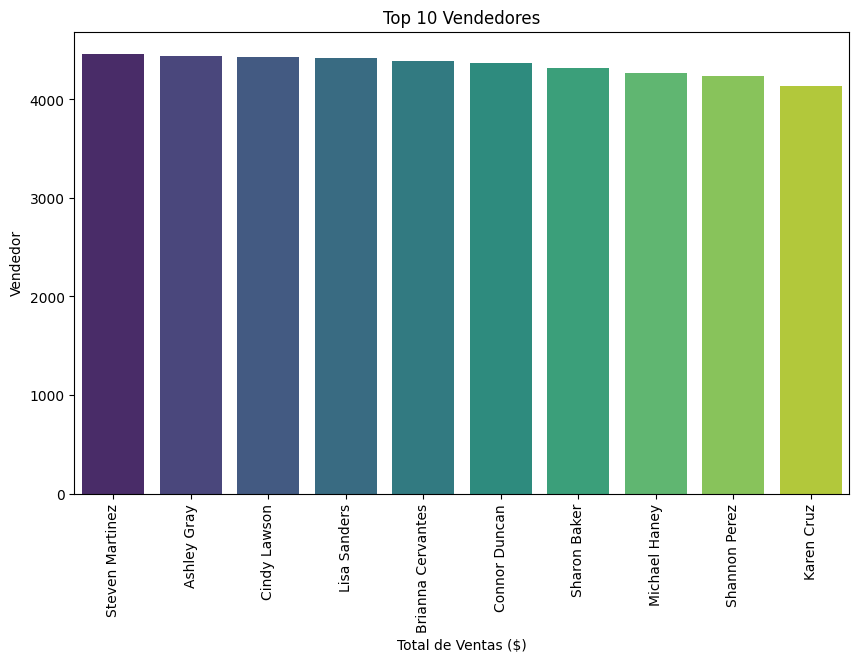

In [68]:
#7. Top 1o empleados de ventas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_empleados=df.groupby(['Empleado_Vendedor'])['Total_Venta'].sum().reset_index()
top_empleados=top_empleados.sort_values(by='Total_Venta',ascending=False)
top_empleados=top_empleados.head(10)
print(top_empleados)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Empleado_Vendedor', y='Total_Venta', palette="viridis",data=top_empleados)
plt.xticks(rotation=90, fontsize=10)

# Etiquetas y título
plt.xlabel("Total de Ventas ($)")
plt.ylabel("Vendedor")
plt.title("Top 10 Vendedores")

# Mostrar gráfico
plt.show()


**Que empleados han generado mas ventas?**

Los mejores vendedores son: Steven Martinez, Ashley Gray y Cindy Lawson

  Estado_Entrega  Frecuencia
0      Entregado         184
1      En camino         176
2      Pendiente         140


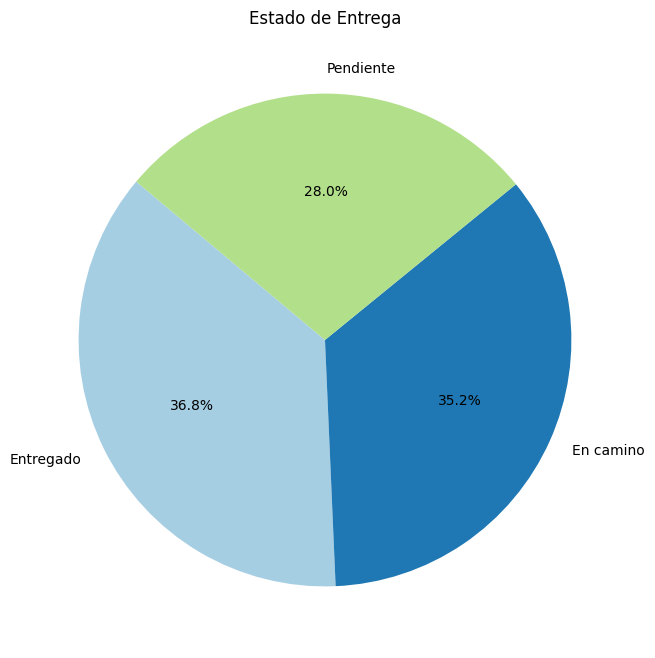

In [75]:
#8. Estado de entrega
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

estado_entrega=df['Estado_Entrega'].value_counts().reset_index()
estado_entrega.columns = ['Estado_Entrega', 'Frecuencia']
print(estado_entrega)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(estado_entrega["Frecuencia"], labels=estado_entrega["Estado_Entrega"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Estado de Entrega")
plt.show()

**Cual es el estado mas comun es las entregas?**

El estatus de entregado es el mas frecuente

  Cupón_Usado  Total_Venta
0          No    286859.76
1          Sí    412516.29


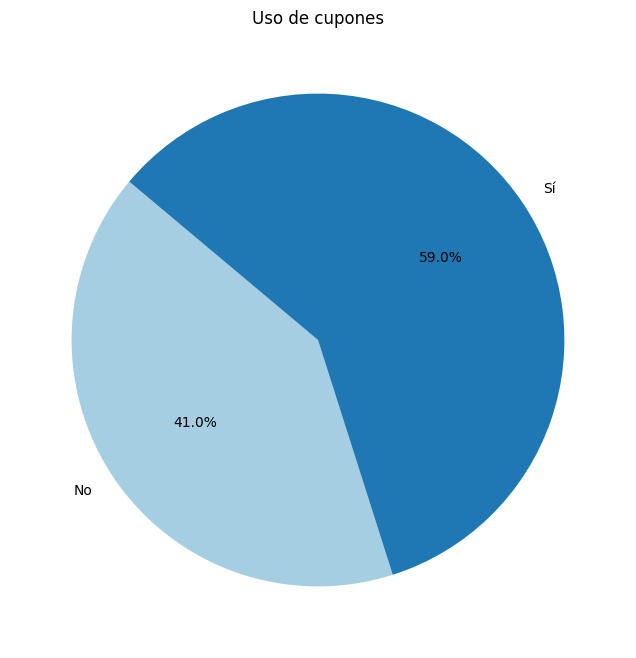

In [78]:
#9. Ventas con cupones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

venta_con_cupones=df.groupby(['Cupón_Usado'])['Total_Venta'].sum().reset_index()
venta_con_cupones.columns=['Cupón_Usado','Total_Venta']
print(venta_con_cupones)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(venta_con_cupones["Total_Venta"], labels=venta_con_cupones["Cupón_Usado"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Uso de cupones")
plt.show()

**El uso de cupones incrementan las ventas?**

Como lo muestra el grafico las ventas con cupones aumenta las ventas ya que representa al rededor del 60% de los ingresos totales.




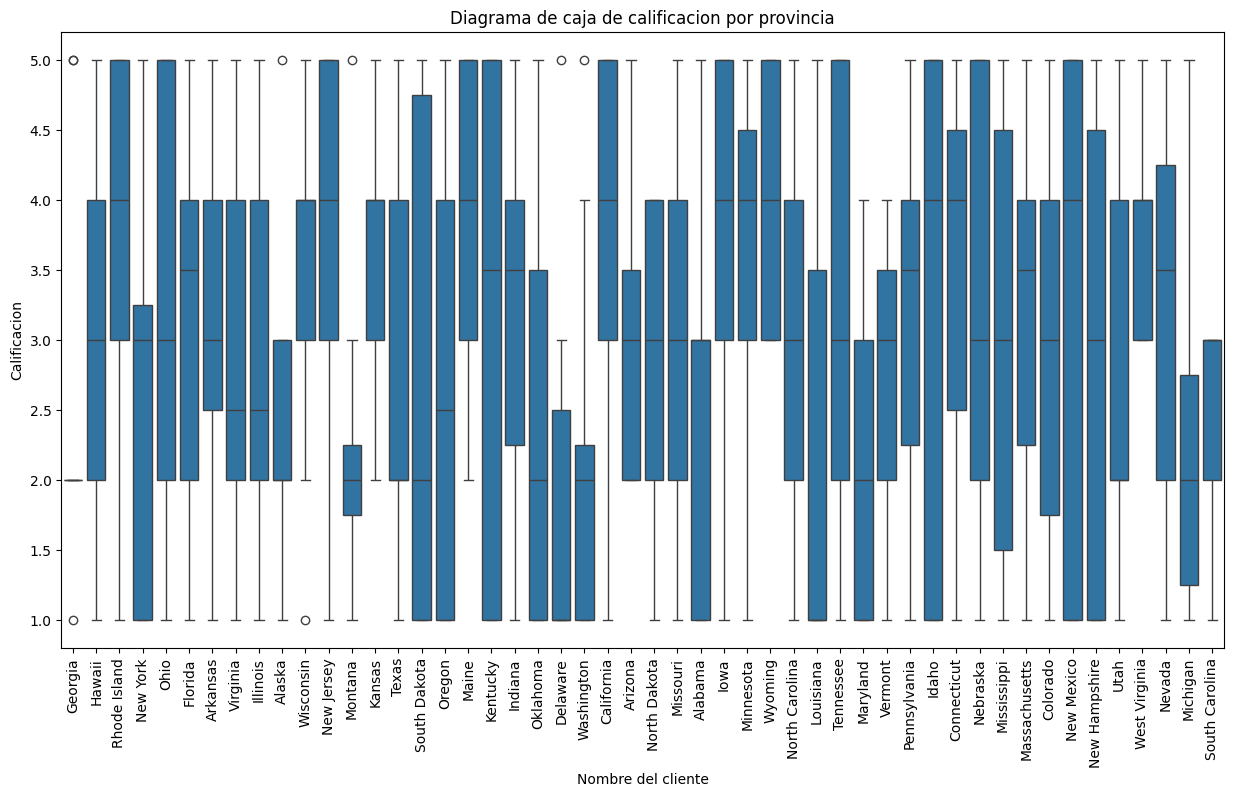

In [84]:
#10. Distribucion de calificaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el box plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df['Provincia'], y=df['Calificación_Cliente'],ax=ax)
plt.xticks(rotation=90)  # Rotar etiquetas si hay muchas provincias
ax.ticklabel_format(style='plain', axis='y')

plt.title("Diagrama de caja de calificacion por provincia")
plt.xlabel("Estados")
plt.ylabel("Calificacion")

# Mostrar el gráfico
plt.show()

**Como estan distribuidas las calificaciones de los clientes?**

Los clientes califican a la tienda de 2 a 4 de calificaion pero con muchos valores atipicos como se puede ver en el estado de Georgia ya que su caja de distribucion es la mas corta y los valores atipicos van de extremo a extremo tambien se puede ver valores atipicos en los estados de Alaska o Delaware